### SparklyRGT Template: choiceRGT

**Requirements**
* The data must be an excel file from MEDPC2XL (trial by trial data) 
* The data, sparklyRGT.py file, and this notebook must all be in the same folder (current working directory) 

**Getting started: Please make a copy of this (sparklyRGT_template_4) for each analysis**
- Refer to sparklyRGT_documentation for function information
- Note: depending on your analysis, you will only have to complete certain sections of the sparklyRGT_documentation (ex. template_4 uses section 1 and 4) 
- Note: feel free to create a personal template once you've become comfortable - this is just an example

In [1]:
import os
os.chdir('..')
import sparklyRGT as rgt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import scipy.stats as stats
import seaborn as sns
import pingouin as pg
pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows',100)
%load_ext autoreload
%autoreload 2

I am being executed!


***

# 1) Load data into Python



In [2]:
file_names = ['Free S33-37 Raw.xlsx'] 
df = rgt.load_data(file_names)
df.head()

,MSN,StartDate,StartTime,Subject,Group,Box,Experiment,Comment,Session,Trial,...,Premature_Resp,Premature_Hole,Rew_Persev_H1,Rew_Persev_H2,Rew_Persev_H4,Rew_Persev_H5,Lever_Latency,Uncued_Chosen,Cued_Chosen,Choice_Omit
0,ChoicerGT_A-FF-CR4,05/23/21,11:26:30,1,0.0,1,0.0,NaN,33,1.0,...,0,0,0,0,0,0,6.97,1,0,0
1,ChoicerGT_A-FF-CR4,05/23/21,11:26:30,1,0.0,1,0.0,NaN,33,2.0,...,0,0,0,0,0,0,2.78,0,1,0
2,ChoicerGT_A-FF-CR4,05/23/21,11:26:30,1,0.0,1,0.0,NaN,33,3.0,...,0,0,0,0,0,0,2.29,0,1,0
3,ChoicerGT_A-FF-CR4,05/23/21,11:26:30,1,0.0,1,0.0,NaN,33,4.1,...,1,5,0,0,0,0,5.48,0,1,0
4,ChoicerGT_A-FF-CR4,05/23/21,11:26:30,1,0.0,1,0.0,NaN,33,4.0,...,0,0,0,0,0,0,1.30,0,1,0


# 4) Choice rGT

Set your variables!

In [3]:
#for plotting: 
title = 'Choice rGT' 

startsess = 33 #first session you would like to include in figures
endsess = 37 #last session you would like to include in figures

In [29]:
control_group = [1,2,3,4,5,6,7,8,9,11,12,13,14,15,16] #In this example: Tg negative rats

exp_group = [17,18,19,20,21,22,23,24] #In this example: Tg positive rats

third_group = [25,26,27,28,29,30,31,32]

group_names = {0: 'control_group',
              1: 'exp_group', 
              2: 'third_group'} 

group_list = [control_group, exp_group, third_group]

title = '' #for plotting

startsess = 33 #first session you would like to include in figures
endsess = 37 #last session you would like to include in figures

## Data cleaning

In [27]:
rgt.check_sessions(df)

Subject  StartDate  Session
1        05/23/21   33          80.0
         05/24/21   34          83.0
         05/25/21   35          85.0
         05/26/21   36          78.0
         05/27/21   37          75.0
2        05/23/21   33         104.0
         05/24/21   34         103.0
         05/25/21   35          87.0
         05/26/21   36          66.0
         05/27/21   37          92.0
3        05/23/21   33         107.0
         05/24/21   34          97.0
         05/25/21   35          98.0
         05/26/21   36         104.1
         05/27/21   37         108.0
4        05/23/21   33         101.0
         05/24/21   34          93.0
         05/25/21   35          94.0
         05/26/21   36          93.1
         05/27/21   37          91.0
5        05/23/21   33          83.0
         05/24/21   34          59.0
         05/25/21   35          52.1
         05/26/21   36          67.1
         05/27/21   37          66.0
6        05/23/21   33          78.0
         0

In [18]:
# df2 = rgt.drop_sessions(df, [28])
# df2 = rgt.edit_sessions(df2, orig_sess = [30, 31], new_sess = [29, 30], subs = "all") 

## Data processing

### Calculate variables for each rat


In [19]:
df_sum = rgt.get_summary_data(df, task = 'choiceRGT') #use df instead of df2 if you didn't do any session editing, v.v.
df_sum

,33P1_C,33P2_C,33P3_C,33P4_C,33P1_U,33P2_U,33P3_U,33P4_U,34P1_C,34P2_C,...,prem_uncued35,prem_cued36,prem_uncued36,prem_cued37,prem_uncued37,pref33,pref34,pref35,pref36,pref37
1,22.9508,8.19672,68.8525,0,42.8571,0,42.8571,14.2857,24.1935,3.22581,...,0.000000,30.000000,10.000000,6.250000,0.000000,90.909091,86.746988,89.534884,88.888889,87.671233
2,11.2676,88.7324,0,0,10,90,0,0,22.5806,74.1935,...,33.333333,11.363636,11.764706,11.267606,12.500000,87.356322,71.000000,74.468085,72.131148,89.873418
3,18.1818,81.8182,0,0,10.7143,85.7143,3.57143,0,8.33333,83.3333,...,17.500000,21.212121,13.235294,13.636364,11.538462,28.421053,19.565217,22.330097,32.673267,22.000000
4,57.6923,0,42.3077,0,86.3636,4.54545,9.09091,0,41.5385,10.7692,...,28.125000,11.111111,15.789474,7.575758,12.121212,71.093750,68.750000,70.370370,81.000000,66.666667
5,25,75,0,0,39.5349,60.4651,0,0,25,75,...,0.000000,11.111111,5.000000,0.000000,12.765957,15.789474,23.076923,17.647059,18.367347,17.543860
6,8.77193,29.8246,38.5965,22.807,0,57.8947,42.1053,0,10.2041,34.6939,...,10.810811,14.285714,17.948718,21.153846,11.111111,75.609756,61.445783,59.340659,58.947368,59.090909
7,0,1.81818,98.1818,0,0,0,100,0,1.81818,0,...,20.000000,3.508772,12.500000,3.174603,50.000000,87.692308,89.062500,92.647059,87.692308,88.732394
8,15.5844,57.1429,15.5844,11.6883,21.4286,50,21.4286,7.14286,30.137,39.726,...,5.555556,15.068493,6.250000,18.666667,14.285714,84.848485,84.536082,80.851064,82.022472,78.125000
9,21.6667,25,48.3333,5,37.5,62.5,0,0,0,97.6744,...,25.000000,8.510638,24.000000,11.926606,23.076923,86.956522,91.150442,86.554622,78.991597,89.344262
10,0.990099,98.0198,0.990099,0,0,100,0,0,0,100,...,28.571429,35.245902,43.478261,20.661157,23.529412,88.800000,80.740741,89.552239,84.137931,87.681159


In [20]:
df_long = rgt.get_long_summary_data(df, df_sum, task = 'choiceRGT')
df_long.columns

Index(['Subject', 'Session', 'P1_C', 'P2_C', 'P3_C', 'P4_C', 'P1_U', 'P2_U',
       'P3_U', 'P4_U', 'risk_cued', 'risk_uncued', 'co_lat_cued',
       'co_lat_uncued', 'ch_lat_cued', 'ch_lat_uncued', 'cued_lev_lat',
       'uncued_lev_lat', 'cued_omit', 'uncued_omit', 'lev_omit', 'trial_init',
       'prem_cued', 'prem_uncued', 'pref'],
      dtype='object')

In [21]:
df_long = rgt.get_group_long(df_long, group_list)
df_long

,Subject,Session,P1_C,P2_C,P3_C,P4_C,P1_U,P2_U,P3_U,P4_U,...,cued_lev_lat,uncued_lev_lat,cued_omit,uncued_omit,lev_omit,trial_init,prem_cued,prem_uncued,pref,group
0,1,33,22.950820,8.196721,68.852459,0.000000,42.857143,0.000000,42.857143,14.285714,...,2.561250,4.135000,0.000000,0.0,12.000000,100,23.750000,12.500000,90.909091,1.0
1,1,34,24.193548,3.225806,72.580645,0.000000,50.000000,10.000000,40.000000,0.000000,...,2.714583,2.193636,1.388889,0.0,10.752688,93,12.500000,9.090909,86.746988,1.0
2,1,35,30.158730,1.587302,68.253968,0.000000,55.555556,0.000000,44.444444,0.000000,...,2.494675,2.676667,1.298701,0.0,12.244898,98,16.883117,0.000000,89.534884,1.0
3,1,36,25.000000,5.357143,69.642857,0.000000,55.555556,0.000000,44.444444,0.000000,...,2.547875,2.361000,0.000000,0.0,12.621359,103,30.000000,10.000000,88.888889,1.0
4,1,37,5.000000,0.000000,93.333333,1.666667,22.222222,0.000000,77.777778,0.000000,...,2.988750,1.216667,0.000000,0.0,7.594937,79,6.250000,0.000000,87.671233,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,32,33,0.000000,11.111111,88.888889,0.000000,1.754386,5.263158,87.719298,5.263158,...,2.427778,2.730476,0.000000,0.0,0.000000,72,0.000000,7.936508,12.500000,3.0
156,32,34,0.000000,20.000000,80.000000,0.000000,8.000000,8.000000,80.000000,4.000000,...,4.948947,2.607273,0.000000,0.0,3.896104,77,21.052632,9.090909,25.675676,3.0
157,32,35,0.000000,51.351351,48.648649,0.000000,0.000000,48.837209,51.162791,0.000000,...,4.114565,2.996471,2.173913,0.0,1.020408,98,17.391304,15.686275,47.422680,3.0
158,32,36,0.000000,31.034483,68.965517,0.000000,2.631579,18.421053,78.947368,0.000000,...,3.480750,2.512857,0.000000,0.0,1.111111,90,27.500000,22.448980,44.943820,3.0


### Export your data to an Excel file 


In [ ]:
# rgt.export_to_excel(df_sum, groups = group_list, column_name = 'sex', new_file_name = 'compare_access2.xlsx', asin = False)
df_sum.to_excel("test_file_name.xlsx")
# make sure new_file_name is a string that ends in .xlsx

## Run Anova on selected variables

In [22]:
rgt.rm_anova(df_long, task = 'choiceRGT')

Unstable df:      variable   p-value
0    lev_omit  0.000278
1  trial_init  0.020335
2        pref  0.016510
Stable df:           variable   p-value
0             P1_C  0.984848
1             P2_C  0.877545
2             P3_C  0.860707
3             P4_C  0.171566
4             P1_U  0.256212
5             P2_U  0.712987
6             P3_U  0.592324
7             P4_U  0.888474
8        risk_cued  0.702109
9      risk_uncued  0.812463
10     co_lat_cued  0.234972
11   co_lat_uncued  0.078974
12     ch_lat_cued  0.105333
13   ch_lat_uncued  0.763667
14    cued_lev_lat  0.071249
15  uncued_lev_lat  0.674377
16       cued_omit  0.915002
17     uncued_omit  0.749938
18       prem_cued  0.120561
19     prem_uncued  0.208718


In [23]:
rgt.mixed_anova(df_long, "group", task = 'choiceRGT')

Unstable list: ['P4_C', 'P1_U', 'uncued_lev_lat', 'cued_omit', 'lev_omit', 'trial_init', 'pref']
Stable list: ['P1_C', 'P2_C', 'P3_C', 'P2_U', 'P3_U', 'P4_U', 'risk_cued', 'risk_uncued', 'co_lat_cued', 'co_lat_uncued', 'ch_lat_cued', 'ch_lat_uncued', 'cued_lev_lat', 'uncued_omit', 'prem_cued', 'prem_uncued']


## Calculate means and SEMs for your experimental groups

Note: there must be at least 3 subjects in each group in group_list

In [24]:
# mean_scores, SEM = rgt.get_means_sem(df_sum, groups = group_list, group_names = group_names) #run this code to group by groups assigned to group_list
# mean_scores

mean_scores, SEM = rgt.get_means_sem(df_sum) #run this code to bypass group_list, will run analysis for all rats 
mean_scores

,33P1_C,33P2_C,33P3_C,33P4_C,33P1_U,33P2_U,33P3_U,33P4_U,34P1_C,34P2_C,...,prem_uncued35,prem_cued36,prem_uncued36,prem_cued37,prem_uncued37,pref33,pref34,pref35,pref36,pref37
All rats,9.43543,49.329,28.7436,12.492,12.0038,50.5828,24.6526,9.63579,9.21668,50.4143,...,13.5574,14.7074,12.8034,14.8795,13.4702,63.3633,61.7211,66.2253,64.6269,65.5589


## Plotting

Refer to documentation in section 2B for the rest of this notebook

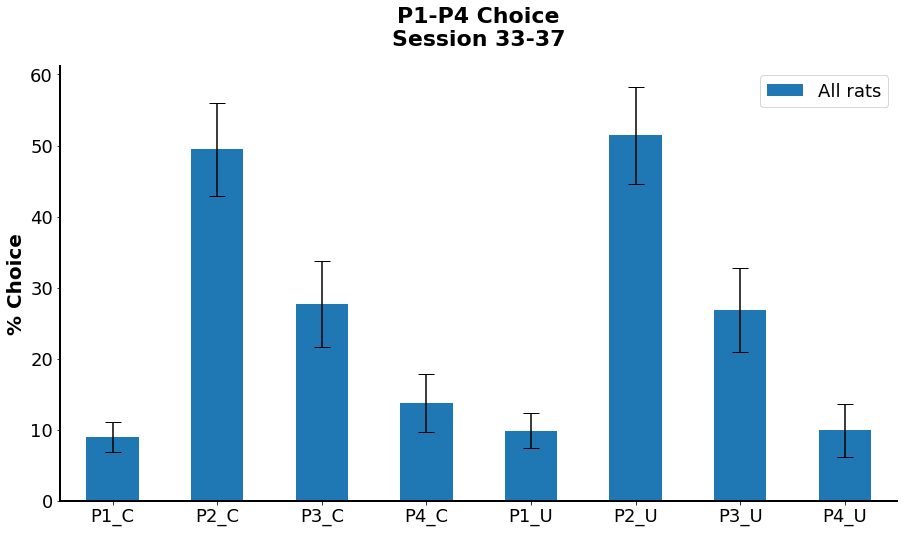

In [30]:
rgt.choice_bar_plot(startsess, endsess, mean_scores, SEM, task = 'choiceRGT')

#to save this figure (or any other figure):
# plt.savefig('BH07 Choice S29-30',facecolor = 'white')

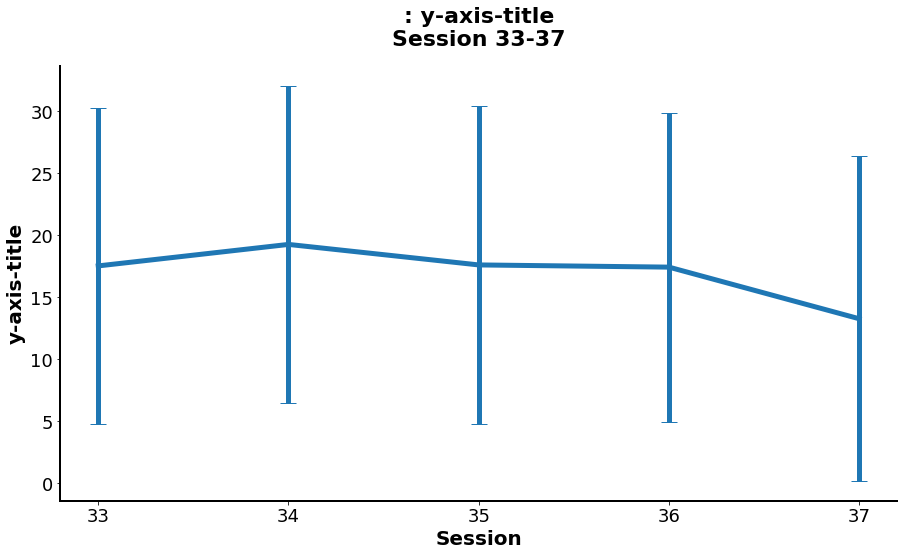

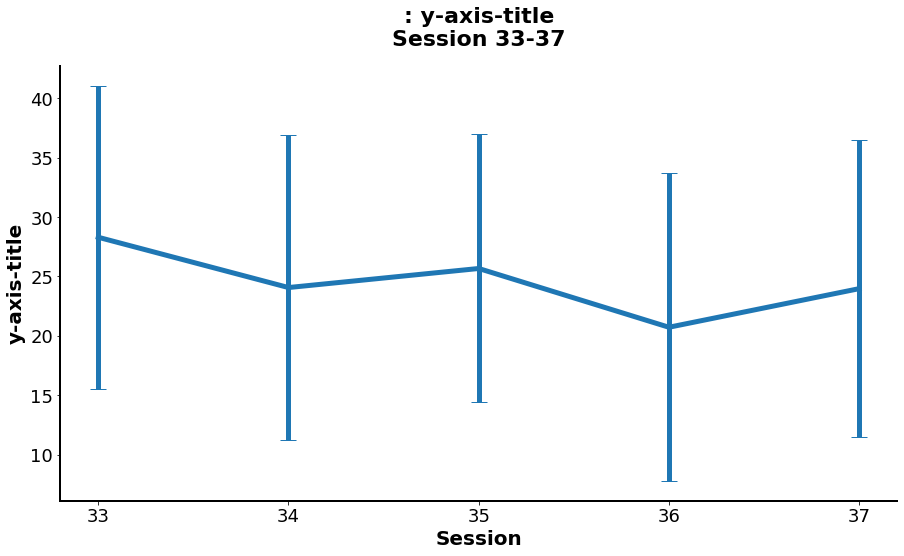

In [31]:
#in both functions, pass "group_names = None" if you are working with "All rats"
#if you are splitting by group_names (object assigned at the start of this notebook), simply pass "group_names" instead of "group_names = None"
rgt.rgt_plot('risk_cued', startsess, endsess, title, mean_scores, SEM, group_names = None, y_label = 'y-axis-title') 
rgt.rgt_plot('risk_uncued', startsess, endsess, title, mean_scores, SEM, group_names = None, y_label = 'y-axis-title') 

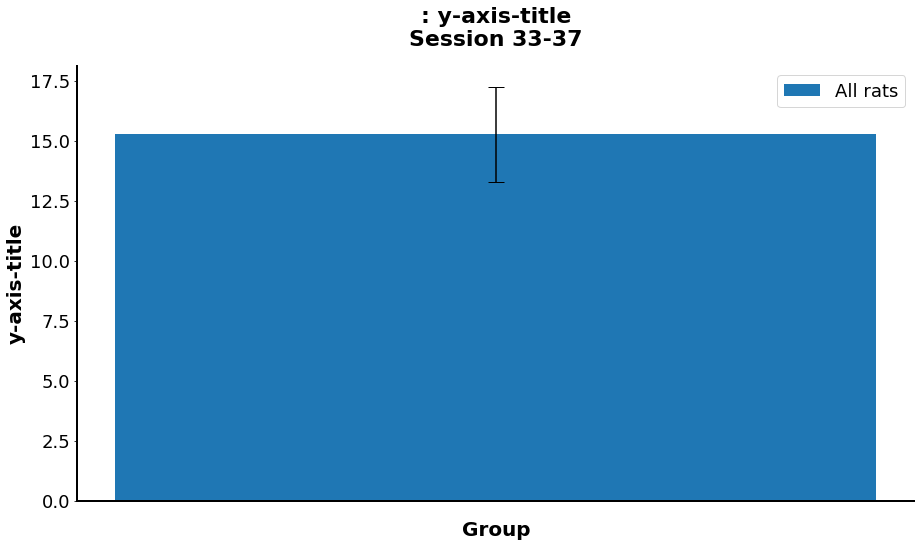

In [32]:
rgt.rgt_bar_plot('prem_cued', startsess, endsess, title, mean_scores, SEM, group_names, y_label = 'y-axis-title')

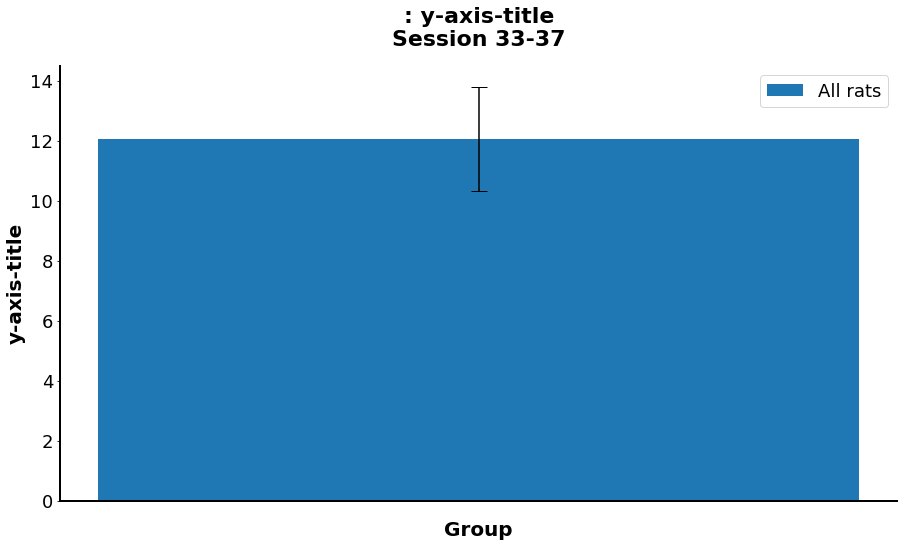

In [33]:
rgt.rgt_bar_plot('prem_uncued', startsess, endsess, title, mean_scores, SEM, group_names, y_label = 'y-axis-title') 